In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
cp = sns.color_palette()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

In [2]:
x = np.linspace(-4, 4, 40)
y_gt = x + 2
y = y_gt+ np.random.normal(scale=1., size=(len(x),))
X = np.concatenate([x[...,None], y[...,None]], axis=-1)

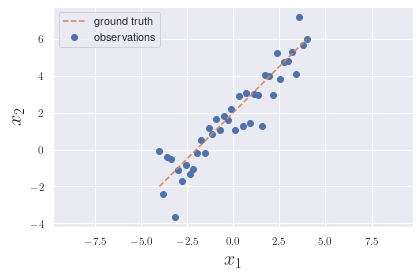

In [19]:
plt.plot(x, y_gt, color=cp[1], linestyle='--', label="ground truth")
plt.scatter(X[:,0], X[:,1], label="observations")
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.axis("equal")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("pca_data.pdf", bbox_inches="tight")

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [11]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.68685076  0.72679848]
 [-0.72679848  0.68685076]]
[11.73439196  0.40652167]


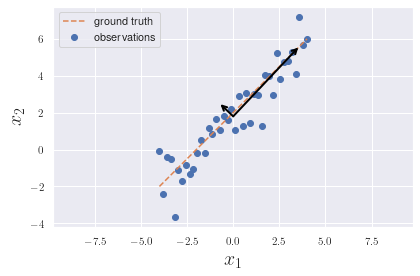

In [22]:
def draw_vector(v0, v1, ax=None, c="black"):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, 
                    color=c)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.plot(x, y_gt, color=cp[1], linestyle='--', label="ground truth")
plt.scatter(X[:,0], X[:,1], label="observations")
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1.5 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis("equal")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("pca_vectors.pdf", bbox_inches="tight")

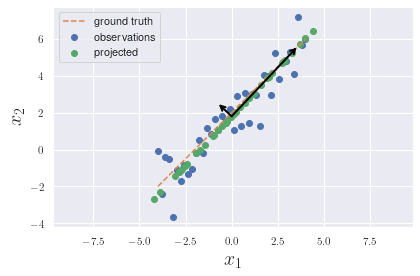

In [31]:
pca_single = PCA(n_components=1)
pca_single.fit(X)
X_pca = pca_single.transform(X)
X_new = pca_single.inverse_transform(X_pca)

# plot data
plt.plot(x, y_gt, color=cp[1], linestyle='--', label="ground truth")
plt.scatter(X[:,0], X[:,1], label="observations")
plt.scatter(X_new[:,0], X_new[:,1], color=cp[2], label="projected")
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1.5 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis("equal")
plt.legend(loc="upper left")
plt.tight_layout()
plt.tight_layout()
plt.savefig("pca_projected.pdf", bbox_inches="tight")

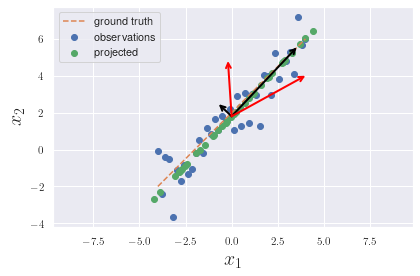

In [30]:
pca_single = PCA(n_components=1)
pca_single.fit(X)
X_pca = pca_single.transform(X)
X_new = pca_single.inverse_transform(X_pca)

# plot data
plt.plot(x, y_gt, color=cp[1], linestyle='--', label="ground truth")
plt.scatter(X[:,0], X[:,1], label="observations")
plt.scatter(X_new[:,0], X_new[:,1], color=cp[2], label="projected")
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1.5 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

draw_vector(pca.mean_, pca.mean_ + np.array([4,2.2]), c="red")
draw_vector(pca.mean_, pca.mean_ + np.array([-.2,3]), c="red")
    
plt.axis("equal")
plt.legend(loc="upper left")
plt.tight_layout()
plt.tight_layout()
plt.savefig("pca_ae.pdf", bbox_inches="tight")

In [33]:
cp.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [40]:
cp._repr_html_

<bound method _ColorPalette._repr_html_ of [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]>

In [41]:
cp[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)